In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from mcmc_samplers import SGHMCSampler,LossModule
from ResForkNet import *
import utils as ut
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from collections import OrderedDict
import matplotlib.pyplot as plt
import hiddenlayer as hl
from IPython.display import display, clear_output
import os
import time
torch.manual_seed(0)
device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(device)

plt.style.use('ggplot')

cpu


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Plotting data

/mnt/workspace/.local/lib/python3.5/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


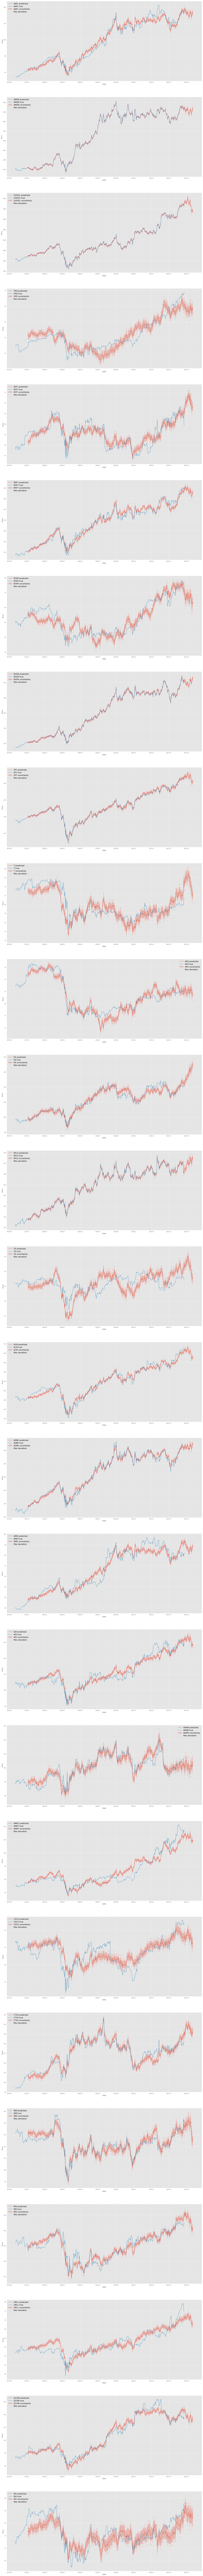

In [2]:
stocks = ['AAPL','AMZN','GOOGL','HPQ','INTC','MSFT','NTAP','NVDA','SPY','T','XRX',
         'EA','NFLX','VZ','ACN','ADBE','AMD','ADI','AKAM','AMAT','CSCO','CTXS','IBM','MSI','ORCL','QCOM','WU']
window = 30
pred_window = 30
num_f = 60
transform = ut.ToTensor()
dataset = ut.TechnicalPortfolioTimeSeries(components = stocks, window = window, pred_window = pred_window,transform = transform)
loader = DataLoader(dataset, batch_size=len(dataset),shuffle=False, num_workers=0)
model = ResForkNet(n_dependents = len(stocks), num_inputs = num_f, timesteps = window, num_channels = [128]*2, ll_sizes=[10,100,64])
ut.plot_predictions_from_files('Models/month', model, stocks, loader, dataset, window, pred_window, num_f, show_days = 400, savefig = False)